In [2]:
#importing all the necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading dataset and renaming columns as they were not labelled earlier.
dataset=pd.read_csv('/content/Enrolmen-in-District-wise-during-2020-21.csv', header = None)
dataset.columns=['State','District','Primary Schools(B)','Primary Schools(G)','Total(PS)','Middle Schools(B)','Middle Schools(G)','Total(MS)','High Schools(B)','High Schools(G)','Total(HS)']
dataset

,State,District,Primary Schools(B),Primary Schools(G),Total(PS),Middle Schools(B),Middle Schools(G),Total(MS),High Schools(B),High Schools(G),Total(HS)
0,State,District,Primary Schools (Boys),Primary Schools (Girls),Total in Number,Middle Schools Boys (VI-VIII),Middle Schools Girls (VI-VIII),Total in Number,High/Senior Secondary Schools Boys (IX-XII),High/Senior Secondary Schools Girls (IX-XII),Total in Number
1,Himachal Pradesh,Bilaspur,7974,7832,15806,5594,5723,11317,8827,8405,17232
2,Himachal Pradesh,Chamba,17361,17874,35235,11710,11845,23555,16071,15430,31501
3,Himachal Pradesh,Hamirpur,7344,7216,14560,5590,5675,11265,9536,8743,18279
4,Himachal Pradesh,Kangra,18606,19326,37932,15499,15784,31283,28932,27597,56529
5,Himachal Pradesh,Kinnaur,1454,1530,2984,804,875,1679,1121,1160,2281
6,Himachal Pradesh,Kullu,10487,10972,21459,7319,7852,15171,10455,10919,21374
7,Himachal Pradesh,Lahaul-spiti,592,593,1185,282,358,640,412,467,879
8,Himachal Pradesh,Mandi,19675,19969,39644,14969,15269,30238,24547,24502,49049
9,Himachal Pradesh,Shimla,15013,15642,30655,9909,10344,20253,16743,17100,33843


In [4]:
#There is no need of first row and first column as they are redundant data
#and hence removing them and indexing everything again.

#Remving first row, axis=0 is used for rows
#inplace = True states that make changes in our original dataset only.
dataset.drop(index=dataset.index[0],axis=0,inplace=True)

#Removing first column, axis = 1 is used for columns
dataset.drop(['State'], axis=1, inplace=True)

#indexing everything again after droping columns and row. 
dataset = dataset.reset_index()

dataset

,index,District,Primary Schools(B),Primary Schools(G),Total(PS),Middle Schools(B),Middle Schools(G),Total(MS),High Schools(B),High Schools(G),Total(HS)
0,1,Bilaspur,7974,7832,15806,5594,5723,11317,8827,8405,17232
1,2,Chamba,17361,17874,35235,11710,11845,23555,16071,15430,31501
2,3,Hamirpur,7344,7216,14560,5590,5675,11265,9536,8743,18279
3,4,Kangra,18606,19326,37932,15499,15784,31283,28932,27597,56529
4,5,Kinnaur,1454,1530,2984,804,875,1679,1121,1160,2281
5,6,Kullu,10487,10972,21459,7319,7852,15171,10455,10919,21374
6,7,Lahaul-spiti,592,593,1185,282,358,640,412,467,879
7,8,Mandi,19675,19969,39644,14969,15269,30238,24547,24502,49049
8,9,Shimla,15013,15642,30655,9909,10344,20253,16743,17100,33843
9,10,Sirmaur,16578,16471,33049,10740,10954,21694,14470,14760,29230


In [5]:
#indexing adds one column named 'index' with earlier index values.
#so droping that column.
dataset.drop(['index'], axis=1, inplace=True)
dataset

#This is our final structure of dataset.

,District,Primary Schools(B),Primary Schools(G),Total(PS),Middle Schools(B),Middle Schools(G),Total(MS),High Schools(B),High Schools(G),Total(HS)
0,Bilaspur,7974,7832,15806,5594,5723,11317,8827,8405,17232
1,Chamba,17361,17874,35235,11710,11845,23555,16071,15430,31501
2,Hamirpur,7344,7216,14560,5590,5675,11265,9536,8743,18279
3,Kangra,18606,19326,37932,15499,15784,31283,28932,27597,56529
4,Kinnaur,1454,1530,2984,804,875,1679,1121,1160,2281
5,Kullu,10487,10972,21459,7319,7852,15171,10455,10919,21374
6,Lahaul-spiti,592,593,1185,282,358,640,412,467,879
7,Mandi,19675,19969,39644,14969,15269,30238,24547,24502,49049
8,Shimla,15013,15642,30655,9909,10344,20253,16743,17100,33843
9,Sirmaur,16578,16471,33049,10740,10954,21694,14470,14760,29230


In [6]:
#to check the count no of missing values present in each column of dataframe.

dataset.isnull().sum()

District              0
Primary Schools(B)    0
Primary Schools(G)    0
Total(PS)             0
Middle Schools(B)     0
Middle Schools(G)     0
Total(MS)             0
High Schools(B)       0
High Schools(G)       0
Total(HS)             0
dtype: int64

In [7]:
#gives (no of rows,no of columns)
dataset.shape

(13, 10)

In [8]:
#it gives the datatypes of all the columns.
#which is here referred as object.
#But as we know that all the values we have except the District name is integers so we will change the datatype.

dataset.dtypes

District              object
Primary Schools(B)    object
Primary Schools(G)    object
Total(PS)             object
Middle Schools(B)     object
Middle Schools(G)     object
Total(MS)             object
High Schools(B)       object
High Schools(G)       object
Total(HS)             object
dtype: object

In [9]:
#changing the datatype of all columns except 'District' so that we can plot everything easily.

columns= list(dataset.columns)
columns.remove('District')              #we dont want to change datatype of District column.
for x in columns:
  dataset[x]=dataset[x].astype('int64')

dataset.dtypes


District              object
Primary Schools(B)     int64
Primary Schools(G)     int64
Total(PS)              int64
Middle Schools(B)      int64
Middle Schools(G)      int64
Total(MS)              int64
High Schools(B)        int64
High Schools(G)        int64
Total(HS)              int64
dtype: object

In [10]:
#shows first five rows of the dataset.
dataset.head()

,District,Primary Schools(B),Primary Schools(G),Total(PS),Middle Schools(B),Middle Schools(G),Total(MS),High Schools(B),High Schools(G),Total(HS)
0,Bilaspur,7974,7832,15806,5594,5723,11317,8827,8405,17232
1,Chamba,17361,17874,35235,11710,11845,23555,16071,15430,31501
2,Hamirpur,7344,7216,14560,5590,5675,11265,9536,8743,18279
3,Kangra,18606,19326,37932,15499,15784,31283,28932,27597,56529
4,Kinnaur,1454,1530,2984,804,875,1679,1121,1160,2281


In [11]:
x = np.arange(3)  
print(x)

[0 1 2]


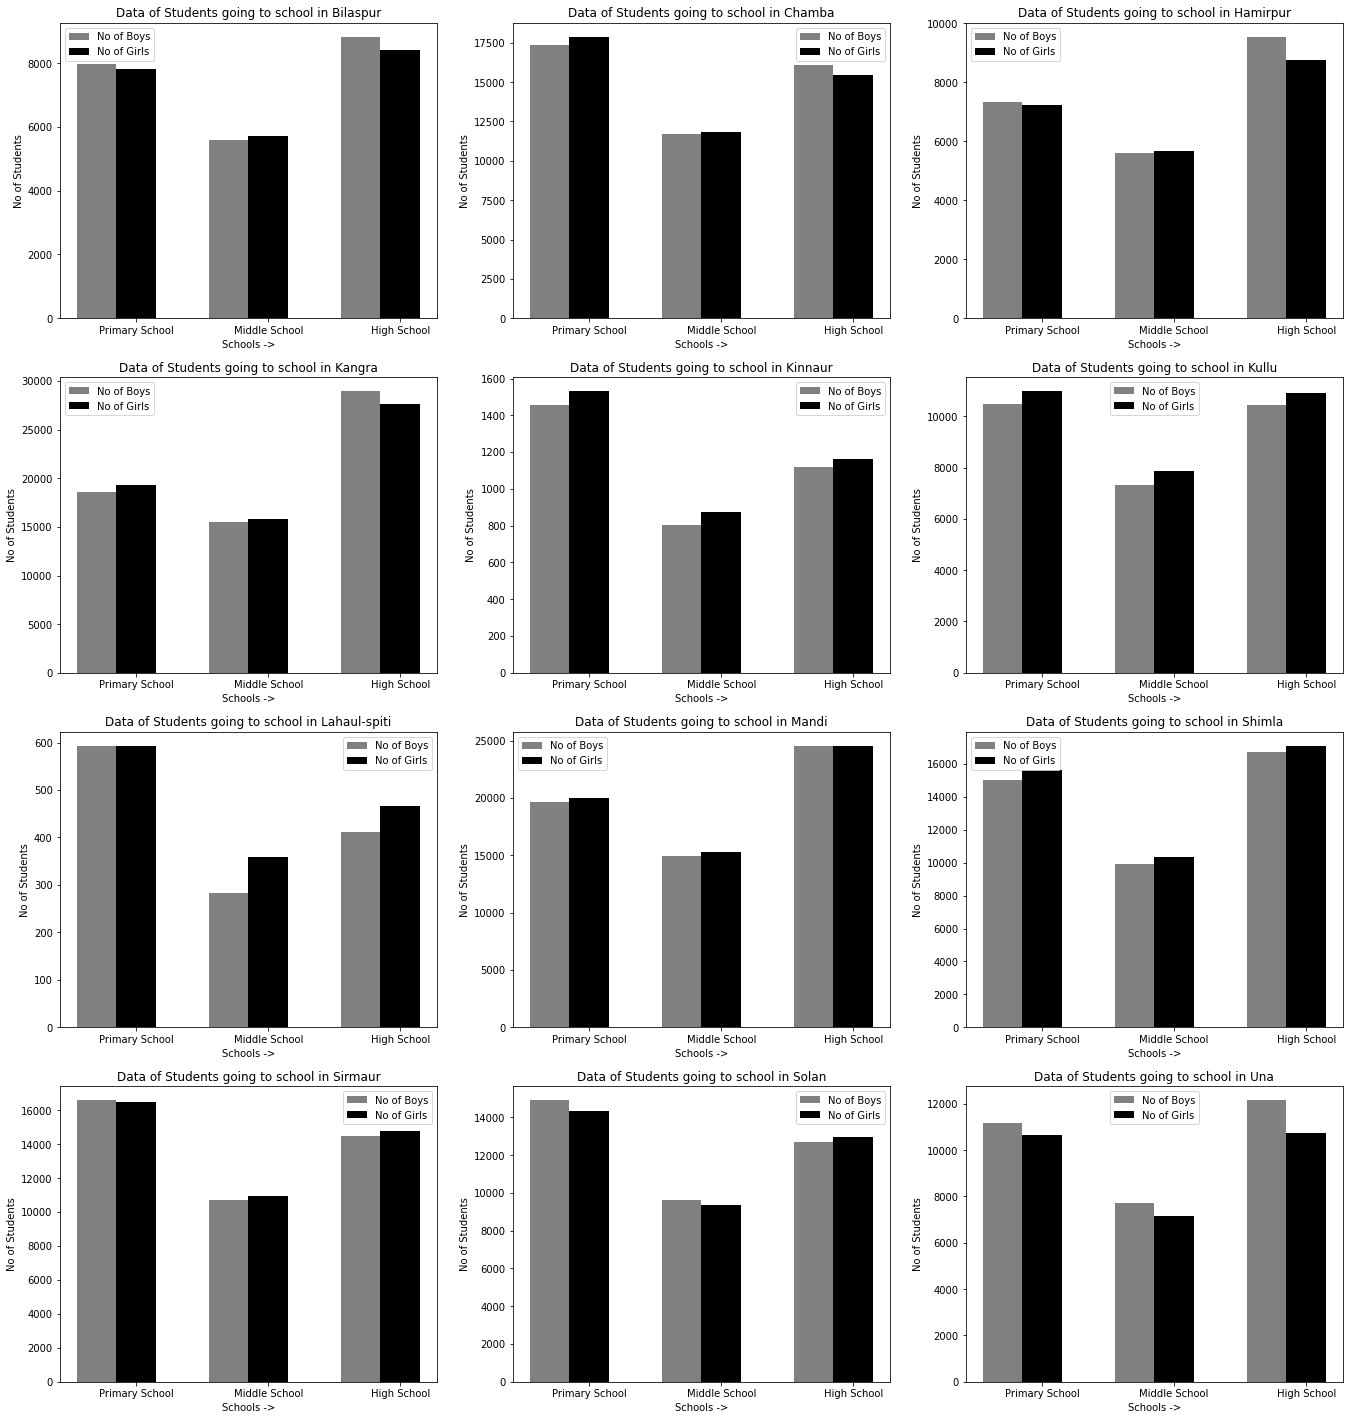

In [12]:
plt.figure(figsize=(23, 25))
values = dataset['District'].unique()                     #got the list of all districts.
l = len(values)

  
for i in range(l-1):
  x = np.arange(3)                                        #returns array of evenly spaced values [0 1 2] i.e. evenly spaced values.  
  #iat[i,j] function is used to fetch value at i th row and j th column.                              
  y1 = [dataset.iat[i,1], dataset.iat[i,4], dataset.iat[i,7]]               #fetching values of boys
  y2 = [dataset.iat[i,2], dataset.iat[i,5], dataset.iat[i,8]]               #fetching values of girls

  #plotting grouped bar plot.
  width = 0.3
  plt.subplot(4, 3, i+1)
  plt.bar(x-0.3, y1, width, color='grey')
  plt.bar(x, y2, width, color='black')
  plt.title('Data of Students going to school in {}'.format(values[i]))
  plt.xticks(x, ['Primary School', 'Middle School', 'High School'])
  plt.xlabel("Schools ->")
  plt.ylabel("No of Students")
  plt.legend(["No of Boys", "No of Girls"])
plt.show()

###From the above plots we conclude that cities of Himachal Pradesh like
####1) Bilaspur, Chamba, Hamirpur, Kangra has almost equal proportion of girls and boys studying till middle school but the no of girls admitted in high school is much less than the no of boys. In these places higher education of girls is not promoted for whatever obvious reasons.
####2) Kinnuaur, Kullu, Lahul-Spiti, Mandi, Shimla, Sirmaur promtes the education of girls. We can colclude this because whether it be Primary, Middle or High School, the no of girls admitted to schools are equal or greater than the no of boys.
####3)The only exception is Solan where the no of girls going to High School is more than than no of boys. Primary/Middle School admissions of girls are less. The Solan city is in favour of Higher Education of girls.
####4) Una is the only city which dosen't promtes the education of girls. Here the no of girls addmitted to the schools is always less than the no of boys.

In [13]:
#dropping last row
dataset.drop(index=dataset.index[12],axis=0,inplace=True)

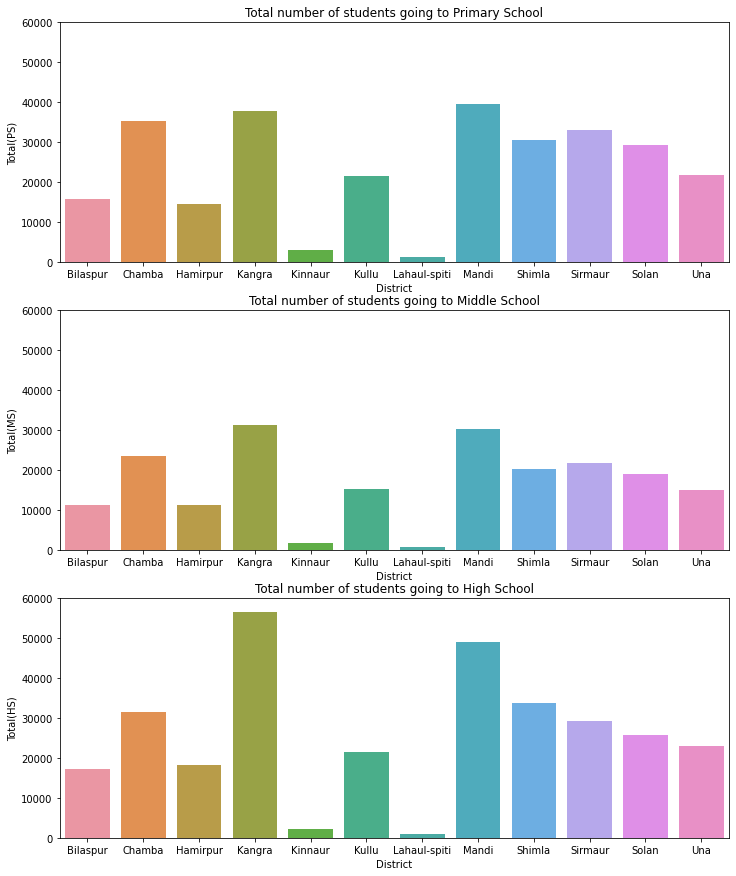

In [14]:
plt.figure(figsize=(12, 15))
columns = ["Total(PS)","Total(MS)","Total(HS)"]
name = ['Primary School','Middle School','High School']

for i in range(len(columns)):
  plt.subplot(3, 1, i+1)
  graph =sns.barplot(x ='District', y =columns[i], data = dataset)
  graph.set_ylim(0,60000)
  plt.title('Total number of students going to {}'.format(name[i]))

plt.show()

###From the above plots we conclude that 
#####amoung all the stated cities of Himachal Pradesh Lahaul-Spiti and Kinnaur has the least amount of students going to school so their literacy rate will be very very low. There can be multiple reasons for that, for eg, 
#####- maybe there are not enough schools present, 
#####- maybe the infrastructure is not so good.
#####- maybe the quality of education is not so good.
#####- or maybe the awareness is less.

#####These cities are of main concern and we need to look at the issues facing by the people so that the overall literacy rate of Himachal Pradesh can be incresed.


#b) Normalization or MinMax Scaler

In [ ]:
obj = MinMaxScaler()          #creating object of minmax scaler

In [ ]:
#we cant apply scaling to string objects so removing that from our column lists.
cols= list(dataset.columns)
cols.remove('District') 

#print(cols)

['Primary Schools(B)', 'Primary Schools(G)', 'Total(PS)', 'Middle Schools(B)', 'Middle Schools(G)', 'Total(MS)', 'High Schools(B)', 'High Schools(G)', 'Total(HS)']


In [ ]:
#obj.fit_transform(dataset[cols])                 #it returns ndarray so need to convert in a dataframe and add the District column.

values = dataset['District'].unique()  
norm_dataset = pd.DataFrame(obj.fit_transform(dataset[cols]),columns = cols)
norm_dataset.insert(loc = 0,column = 'District',value = values)

,District,Primary Schools(B),Primary Schools(G),Total(PS),Middle Schools(B),Middle Schools(G),Total(MS),High Schools(B),High Schools(G),Total(HS)
0,Bilaspur,0.386836,0.373607,0.380171,0.349083,0.347789,0.348432,0.295056,0.292591,0.293854
1,Chamba,0.878740,0.891877,0.885358,0.751002,0.744652,0.747805,0.549053,0.551530,0.550261
2,Hamirpur,0.353823,0.341815,0.347773,0.348820,0.344678,0.346735,0.319916,0.305050,0.312668
3,Kangra,0.943982,0.966815,0.955485,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Kinnaur,0.045171,0.048359,0.046777,0.034304,0.033515,0.033907,0.024860,0.025544,0.025193


###10th row Before Normalization

#####Difference between loc and iloc is:
#####loc is label-based, which means that we have to specify rows and columns based on their row and column labels. 
#####iloc is integer position-based, so we have to specify rows and columns by their integer position values (0-based integer position).

In [ ]:
#10th row has index = 9.
dataset.iloc[[9]]  # double brackets = DataFrame result; single brackets = Series Result

,District,Primary Schools(B),Primary Schools(G),Total(PS),Middle Schools(B),Middle Schools(G),Total(MS),High Schools(B),High Schools(G),Total(HS)
9,Sirmaur,16578,16471,33049,10740,10954,21694,14470,14760,29230


###10th row After Normalization

In [ ]:
norm_dataset.iloc[[9]]  # DataFrame result

,District,Primary Schools(B),Primary Schools(G),Total(PS),Middle Schools(B),Middle Schools(G),Total(MS),High Schools(B),High Schools(G),Total(HS)
9,Sirmaur,0.837709,0.819467,0.828519,0.687258,0.686892,0.687074,0.492917,0.526834,0.509452


#c) Standardization or Standard Scaler

In [ ]:
obj = StandardScaler()

In [ ]:
#we cant apply scaling to string objects so removing that from our column lists.
cols= list(dataset.columns)
cols.remove('District') 


In [ ]:
#fit_transform returns ndarray so need to convert in a dataframe and add the District column.

values = dataset['District'].unique()  
st_dataset = pd.DataFrame(obj.fit_transform(dataset[cols]),columns = cols)
st_dataset.insert(loc = 0,column = 'District',value = values)

In [ ]:
dataset.iloc[[9]]

,District,Primary Schools(B),Primary Schools(G),Total(PS),Middle Schools(B),Middle Schools(G),Total(MS),High Schools(B),High Schools(G),Total(HS)
9,Sirmaur,16578,16471,33049,10740,10954,21694,14470,14760,29230


In [ ]:
st_dataset.iloc[[9]]

,District,Primary Schools(B),Primary Schools(G),Total(PS),Middle Schools(B),Middle Schools(G),Total(MS),High Schools(B),High Schools(G),Total(HS)
9,Sirmaur,0.785415,0.733031,0.759268,0.526707,0.538267,0.532753,0.186231,0.262213,0.223961


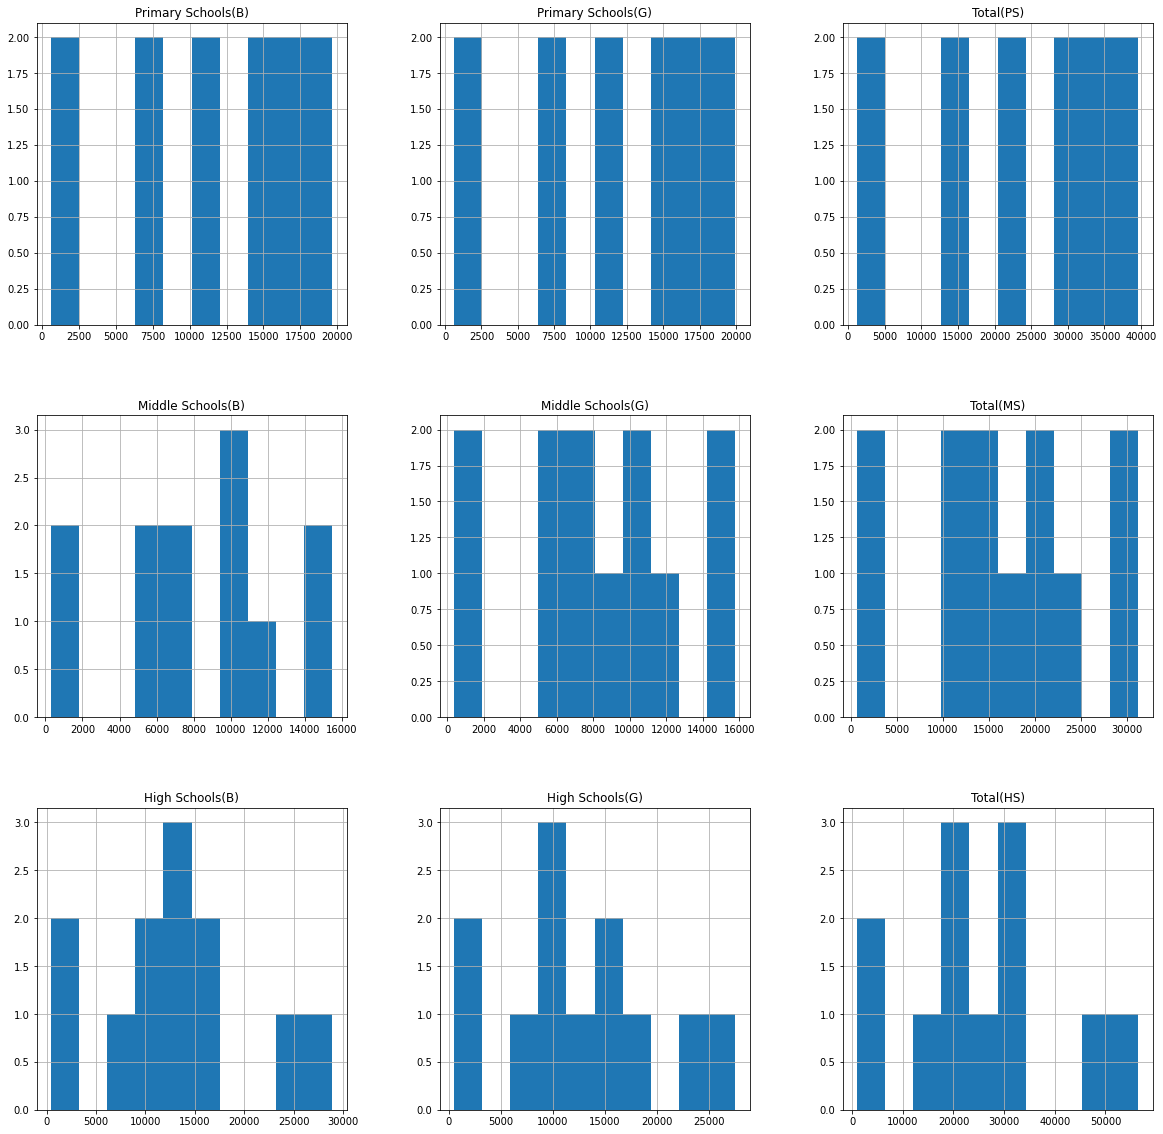

In [ ]:
dataset.hist(figsize=(20,20))
plt.show()

###d)Data suitable for Normalization 
#####Normalization is useful when we don't know about the distribution of features. It is also useful for data having variable scaling techniques.When our data values are very disturbed or there is a very large difference. Outliers in the data will be affected by normalisation because it requires an abundant range.

###Data suitable for Standardization?
#####Standardization is useful when we have the knowledge about the distribution of features. it is also useful when data has variable dimensions.Outliers in data won't be affected by standardisation because standardisation does not always have a bounding range.


###For our dataset we will use Standarizarion:
#####As we have seen plots of every columns, none of the above column follows guassian distribution and it is adviced to use standarization for non guassian distribution rather than normalization method. 